In [1]:
# Imports
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
dados = pd.read_csv('Student_Performance.csv')

In [3]:
dados.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
dados.sample(n=10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
5212,5,78,Yes,7,9,67.0
5601,8,76,No,8,4,77.0
3281,8,41,No,9,3,36.0
7960,1,81,No,6,6,55.0
2067,8,47,No,8,8,42.0
7711,5,40,No,6,5,28.0
3035,2,57,No,7,8,36.0
4574,1,70,Yes,8,9,45.0
6733,9,78,Yes,8,2,76.0
3124,9,72,No,9,0,66.0


Esse dataset está adequado, não há necessidade de limpeza e tratamento de valores ausentes. Uma boa prática seria remover os espaços e letras maiúsculas.

In [5]:
#Formatando o dataframe
dados_f = pd.DataFrame({'hours_studied': dados['Hours Studied'],
                       'previous_scores': dados['Previous Scores'],
                       'extracurricular_activities': dados['Extracurricular Activities'],
                       'sleep_hours': dados['Sleep Hours'],
                       'sample_question_papers_practiced': dados['Sample Question Papers Practiced'],
                       'performance_index': dados['Performance Index']})

# Análise Exploratória

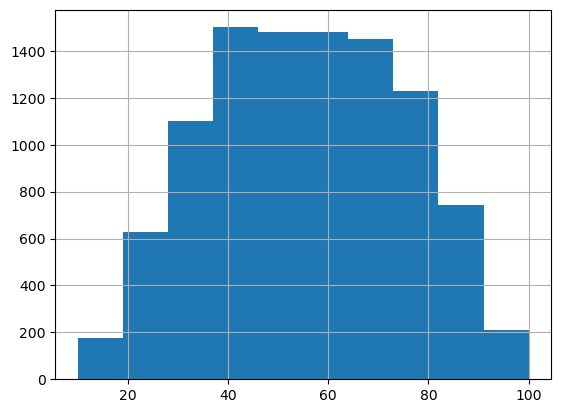

In [6]:
dados_f['performance_index'].hist();

In [7]:
dados_f.count()

hours_studied                       10000
previous_scores                     10000
extracurricular_activities          10000
sleep_hours                         10000
sample_question_papers_practiced    10000
performance_index                   10000
dtype: int64

In [8]:
dados_f.dtypes

hours_studied                         int64
previous_scores                       int64
extracurricular_activities           object
sleep_hours                           int64
sample_question_papers_practiced      int64
performance_index                   float64
dtype: object

In [9]:
 dados_f["extracurricular_activities"] = dados_f["extracurricular_activities"].map({"Yes": 1, "No": 0})

In [10]:
dados_f.head()

,hours_studied,previous_scores,extracurricular_activities,sleep_hours,sample_question_papers_practiced,performance_index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [11]:
dados.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [12]:
#Função para o plot da relação da variável alvo com alguns atributos
def get_pairs(data, alvo, atributos, n):
    
    #Grupos de linhas com 3 (n) gráficos por linha
    grupos_linhas = [atributos[i:i+n] for i in range(0, len(atributos), n)]

    #Loop pelos grupos de linhas para criar cada pair plot
    for linha in grupos_linhas:
        plot = sns.pairplot(x_vars = linha, y_vars = alvo, data = data, kind = "reg", height = 3)

    return

In [13]:
#Variável alvo
alvo = ['performance_index']

In [14]:
#Restante das variáveis preditoras
atributos = ['hours_studied', 'previous_scores', 'extracurricular_activities', 'sleep_hours', 'sample_question_papers_practiced'] 

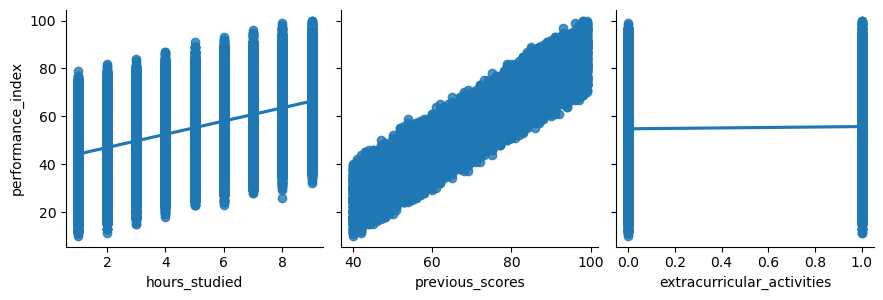

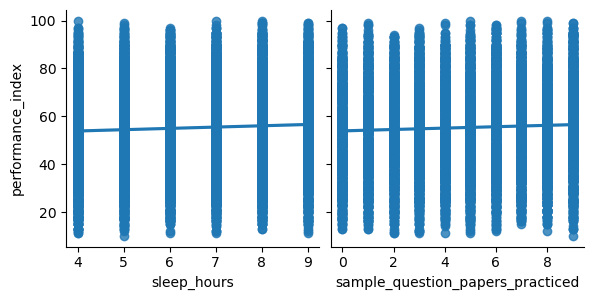

In [15]:
#Verificando se há presença de outliers ou algo fora do normal. 
get_pairs(dados_f, alvo, atributos, 3)

In [16]:
dados_f.corr()

,hours_studied,previous_scores,extracurricular_activities,sleep_hours,sample_question_papers_practiced,performance_index
hours_studied,1.000000,-0.012390,0.003873,0.001245,0.017463,0.373730
previous_scores,-0.012390,1.000000,0.008369,0.005944,0.007888,0.915189
extracurricular_activities,0.003873,0.008369,1.000000,-0.023284,0.013103,0.024525
sleep_hours,0.001245,0.005944,-0.023284,1.000000,0.003990,0.048106
sample_question_papers_practiced,0.017463,0.007888,0.013103,0.003990,1.000000,0.043268
performance_index,0.373730,0.915189,0.024525,0.048106,0.043268,1.000000


Devido ao tamanho do DataSet olhar para a tabela não é tão desagradável, mas com um volume de dados maiores o excesso acaba incomodando a vista. É possível criar uma função para tornar a visualização mais agradável.

In [17]:
# Função para filtrar e visualizar correlação
def filtrar_e_visualizar_correlacao(df, threshold, drop_column = None):

    # Calcula a matriz de correlação
    corr = df.corr()
    
    # Aplica os filtros de limiar, excluindo a correlação perfeita
    filtro = (abs(corr) >= threshold) & (corr != 1.0)
    df_filtrado = corr.where(filtro).dropna(how = 'all').dropna(axis = 1, how = 'all')
    
    # Remove a coluna e linha especificada, se fornecido
    if drop_column:
        df_filtrado = df_filtrado.drop(index = drop_column, 
                                       errors = 'ignore').drop(columns = drop_column, 
                                                               errors = 'ignore')
    
    # Visualiza o resultado com um heatmap somente com as variáveis que satisfazem o critério de filtro
    plt.figure(figsize = (8, 6))
    sns.heatmap(df_filtrado, annot = True, cmap = 'coolwarm', center = 0)
    plt.show()

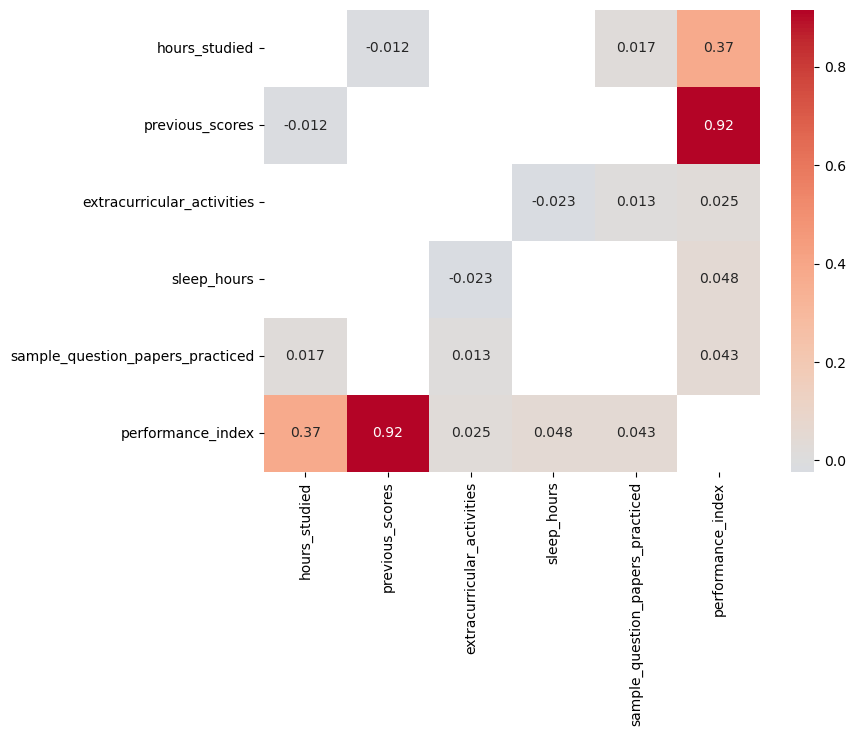

In [18]:
filtrar_e_visualizar_correlacao(dados_f, threshold = 0.01, drop_column = None)

O que mais chama a atenção no mapa de calor acima é o quão baixo é o nível de correlação entre praticamente todas as variáveis, à exceção da "Previous Scores", que é o resultado das notas anteriores. Basicamente a única variável boa para explicar/prever as pontuações futuras dos estudantes é a "Previous Scores", provavelmente irá acarretar um dado de vazamento de dados. O modelo vai ter um score alto e generalização não tão boa.

In [19]:
#Split dos dados em X e Y
x = dados_f[['hours_studied', 'previous_scores', 'extracurricular_activities', 'sleep_hours', 'sample_question_papers_practiced']].values
y = dados_f.performance_index.values.reshape(-1,1)

In [20]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [21]:
len(x_treino)

8000

In [22]:
len(x_teste)

2000

In [23]:
len(y_treino)

8000

In [24]:
len(y_teste)

2000

In [25]:
#Hora de criar o Scaler e transformar os dados em X

scaler = StandardScaler()

In [26]:
scaler.fit(x_treino)

StandardScaler()

In [27]:
#Scaler nos dados de treino e teste
x_treino_scaled = scaler.transform(x_treino)
x_teste_scaled = scaler.transform(x_teste)

In [28]:
x_treino_scaled.shape

(8000, 5)

In [29]:
modelo_v1 = LinearRegression()

In [30]:
#Treinamento do modelo
modelo_v1.fit(x_treino_scaled, y_treino)

LinearRegression()

In [31]:
y_pred_treino_v1 = modelo_v1.predict(x_treino_scaled)

In [32]:
#Print das métricas em treino
print('Mean Absolute Error:', metrics.mean_absolute_error(y_treino, y_pred_treino_v1))
print('Mean Squared Error:', metrics.mean_squared_error(y_treino, y_pred_treino_v1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_treino, y_pred_treino_v1)))
print('R2 Score:', metrics.r2_score(y_treino, y_pred_treino_v1))

Mean Absolute Error: 1.6161649478038
Mean Squared Error: 4.164148459949527
Root Mean Squared Error: 2.040624526940105
R2 Score: 0.9889033042773491


# Testando o modelocom novos Dados

In [33]:
#Carregando os novos dados
novos_dados = pd.read_csv('student_performance_test_binary.csv')

In [34]:
novos_dados_scaled = scaler.transform(novos_dados)

In [35]:
previsao = modelo_v1.predict(novos_dados_scaled)

In [36]:
print('De acordo com os dados de entrada a previsão da nota de cada aluno é:', 
      np.round(previsao, 2))

De acordo com os dados de entrada a previsão da nota de cada aluno é: [[88.85]
 [53.2 ]
 [51.82]
 [69.04]
 [84.34]
 [59.28]
 [58.36]
 [44.65]
 [49.92]
 [40.31]
 [72.68]
 [37.04]
 [63.78]
 [40.86]
 [75.52]
 [42.94]
 [90.04]
 [48.57]
 [43.32]
 [33.11]
 [54.09]
 [67.25]
 [35.86]
 [16.31]
 [30.22]
 [59.47]
 [78.74]
 [95.22]
 [67.65]
 [49.09]
 [75.35]
 [64.1 ]
 [63.85]
 [88.09]
 [34.77]
 [73.88]
 [66.07]
 [81.35]
 [49.2 ]
 [81.64]
 [72.19]
 [35.81]
 [38.6 ]
 [85.12]
 [53.3 ]
 [29.7 ]
 [73.26]
 [59.9 ]
 [53.55]
 [68.04]
 [40.98]
 [34.69]
 [85.7 ]
 [44.62]
 [68.  ]
 [68.24]
 [63.86]
 [30.38]
 [39.  ]
 [64.9 ]
 [31.69]
 [87.99]
 [87.87]
 [80.46]
 [20.03]
 [38.32]
 [54.96]
 [92.35]
 [48.04]
 [24.16]
 [45.59]
 [61.55]
 [52.3 ]
 [40.24]
 [49.8 ]
 [42.8 ]
 [55.88]
 [47.5 ]
 [68.6 ]
 [41.37]
 [78.64]
 [47.6 ]
 [48.79]
 [50.21]
 [37.2 ]
 [94.14]
 [91.88]
 [86.07]
 [61.3 ]
 [44.27]
 [51.43]
 [71.76]
 [66.39]
 [60.16]
 [79.2 ]
 [36.68]
 [41.63]
 [60.48]
 [72.31]
 [33.64]
 [31.35]
 [52.91]
 [68.92]
 [4

A proposta inicial era testar diversos algoritmos na construção do modelo. Contudo, a análise do mapa de calor mostrou que apenas uma variável apresentava correlação suficiente para prever a variável-alvo. Após os testes com um modelo vanilla, que alcançou um R² de 98%, decidiu-se encerrar o projeto com essa versão. Trata-se de um projeto entry level.